#**MILESTONE - 1**  
Pratama Waskito Prihandaa - FTDS BATCH 003  

Dashboard link :
https://datastudio.google.com/s/sY-p3QXo_YU

# PROBLEM STATEMENT

## Definition

What is family violence?

Family violence is any threatening, coercive, dominating or abusive behaviour that occurs between people in a family, domestic or intimate relationship, or former intimate relationship, that causes the person experiencing the behaviour to feel fear.

Family violence is not only an argument once in a while, it is a continuous pattern of abusive behaviour perpetrated by one person towards another.

In West Java, family violence covers a range of behaviours committed by a person against a family member. All the behaviours aim to control a family member through fear, and include the following:

  * physical abuse
  * sexual abuse
  * emotional or psychological abuse
  * any other behavior that cause family member to fear for their safety

In this dataset contains the number of victim of family violence based on gender in province West Java from year 2017 to 2021.  
This dataset was created by Dinas Pemberdayaan Perempuan Perlindungan Anak dan Keluarga Berencana, the government institution for family and children protection in Indonesia.

The data source is from :  
https://opendata.jabarprov.go.id/id/dataset/jumlah-korban-kekerasan-terhadap-anak-laki-laki-berdasarkan-kelompok-usia-dan-kabupatenkota-di-jawa-barat

and 

https://opendata.jabarprov.go.id/id/dataset/jumlah-korban-kekerasan-terhadap-anak-perempuan-berdasarkan-kelompok-usia-dan-kabupatenkota-di-jawa-barat


## Objective

To get statistical insight about social issue regarding the family violence in West Java province and to give analysis result to government of the statistical insight.

## Question

1. What city is the highest number of family violence towards male?
2. What city is the highest number of family violence towards female?
3. In what range of age male and female has the highest number of victim in family violence?
4. What city is the lowest number of family violence towards both male and female?
5. Which gender is the highest number of victim in West Java province?
6. From 2017 to 2021, what city is the first rank from month to month towards male and female?

# IMPORTING LIBRARY

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import math
import sympy as sy
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import seaborn as sns
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

auth.authenticate_user()
print('Authenticated')

project_id = 'hacktiv8-tama'
client = bigquery.Client(project = project_id)

Authenticated


# DATA SOURCE

The data is provided by a goverment social institution of Family and children protection in Indonesia, Dinas Pemberdayaan Perempuan Perlindungan Anak dan Keluarga Berencana, in province West Java.  

###1. Dataframe Family violence towards female :

source :  
https://opendata.jabarprov.go.id/id/dataset/jumlah-korban-kekerasan-terhadap-anak-perempuan-berdasarkan-kelompok-usia-dan-kabupatenkota-di-jawa-barat

BigQuery :  
hacktiv8-tama.kekerasan_pada_lakilaki_perempuan

In [48]:
fam_violence_female = client.query('''
  select *
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
  order by tahun, id asc''').to_dataframe()
fam_violence_female.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_usia,jumlah_korban,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-5 TAHUN,0,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,6-12 TAHUN,0,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,13-17 TAHUN,0,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,18-24 TAHUN,1,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,25-44 TAHUN,1,2017


###2. Dataframe Family violence towards male

source :  
https://opendata.jabarprov.go.id/id/dataset/jumlah-korban-kekerasan-terhadap-anak-laki-laki-berdasarkan-kelompok-usia-dan-kabupatenkota-di-jawa-barat

BigQuery :  
hacktiv8-tama.kekerasan_pada_lakilaki_lakilaki

In [49]:
fam_violence_male = client.query('''
  select *
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
  order by id, tahun''').to_dataframe()
fam_violence_male.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kelompok_usia,jumlah_korban,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0-5 TAHUN,0,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,6-12 TAHUN,1,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,13-17 TAHUN,0,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,18-24 TAHUN,0,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,25-44 TAHUN,0,2017


# DATA CLEANING

Before we go to deep analysis, the data from the source has to be checked to prevent error in code such missing value or type data of the column.

In [50]:
# first dataframe
print('MALE :')
print(fam_violence_male.isnull().sum(), '\n')

# second dataframe
print('FEMALE :')
print(fam_violence_female.isnull().sum())

MALE :
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
kelompok_usia          0
jumlah_korban          0
tahun                  0
dtype: int64 

FEMALE :
id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
kelompok_usia          0
jumlah_korban          0
tahun                  0
dtype: int64


The data has been checked and there is no missing value. Now let's go to the analysis.

# ANALYSIS POINT

###1. What city is the highest number of family violence towards male?

From the original dataframe above, it's better if we summarize the table into separate column based on the age of victim :

In [51]:
fam_violence_male1 = client.query('''
select *
from
  (select
    distinct nama_kabupaten_kota as kabupaten,
    _0_5._0_5,
    _6_12._6_12,
    _13_17._13_17,
    _18_24._18_24,
    _25_44._25_44,
    _45_59._45_59,
    _60_plus._60_plus,
    total_per_kabupaten.total_per_kabupaten
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki` as awal
  join #0_5
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _0_5
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="0-5 TAHUN"
    group by kota) as _0_5
      on awal.nama_kabupaten_kota = _0_5.kota
  join #6_12
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _6_12
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="6-12 TAHUN"
    group by nama_kabupaten_kota) as _6_12
      on awal.nama_kabupaten_kota = _6_12.kota
  join #13_17
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _13_17
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="13-17 TAHUN"
    group by nama_kabupaten_kota) as _13_17
      on awal.nama_kabupaten_kota = _13_17.kota
  join #18_24
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _18_24
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="18-24 TAHUN"
    group by nama_kabupaten_kota) as _18_24
    on awal.nama_kabupaten_kota = _18_24.kota
  join #25_44
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _25_44
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="25-44 TAHUN"
    group by nama_kabupaten_kota) as _25_44
      on awal.nama_kabupaten_kota = _25_44.kota
  join #45_59
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _45_59
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="45-59 TAHUN"
    group by nama_kabupaten_kota) as _45_59
      on awal.nama_kabupaten_kota = _45_59.kota
  join #60+
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _60_plus
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="60+ TAHUN"
    group by nama_kabupaten_kota) as _60_plus
      on awal.nama_kabupaten_kota = _60_plus.kota
  join #total_per_kabupaten
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as total_per_kabupaten
      from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
      group by nama_kabupaten_kota) as total_per_kabupaten
        on awal.nama_kabupaten_kota = total_per_kabupaten.kota)

union all

select 'GRAND TOTAL' as kabupaten,
sum(_0_5) as _0_5,
sum(_6_12) as _6_12,
sum(_13_17) as _13_17,
sum(_18_24) as _18_24,
sum(_25_44) as _25_44,
sum(_45_59) as _45_59,
sum(_60_plus) as _60_plus,
sum(total_per_kabupaten) as total_per_kabupaten
from
(select
    distinct nama_kabupaten_kota as kabupaten,
    _0_5._0_5,
    _6_12._6_12,
    _13_17._13_17,
    _18_24._18_24,
    _25_44._25_44,
    _45_59._45_59,
    _60_plus._60_plus,
    total_per_kabupaten.total_per_kabupaten
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki` as awal
  join #0_5
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _0_5
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="0-5 TAHUN"
    group by kota) as _0_5
      on awal.nama_kabupaten_kota = _0_5.kota
  join #6_12
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _6_12
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="6-12 TAHUN"
    group by nama_kabupaten_kota) as _6_12
      on awal.nama_kabupaten_kota = _6_12.kota
  join #13_17
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _13_17
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="13-17 TAHUN"
    group by nama_kabupaten_kota) as _13_17
      on awal.nama_kabupaten_kota = _13_17.kota
  join #18_24
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _18_24
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="18-24 TAHUN"
    group by nama_kabupaten_kota) as _18_24
    on awal.nama_kabupaten_kota = _18_24.kota
  join #25_44
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _25_44
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="25-44 TAHUN"
    group by nama_kabupaten_kota) as _25_44
      on awal.nama_kabupaten_kota = _25_44.kota
  join #45_59
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _45_59
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="45-59 TAHUN"
    group by nama_kabupaten_kota) as _45_59
      on awal.nama_kabupaten_kota = _45_59.kota
  join #60+
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _60_plus
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
    where kelompok_usia="60+ TAHUN"
    group by nama_kabupaten_kota) as _60_plus
      on awal.nama_kabupaten_kota = _60_plus.kota
  join #total_per_kabupaten
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as total_per_kabupaten
      from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
      group by nama_kabupaten_kota) as total_per_kabupaten
        on awal.nama_kabupaten_kota = total_per_kabupaten.kota)
order by total_per_kabupaten asc
''').to_dataframe().reset_index()
fam_violence_male1

,index,kabupaten,_0_5,_6_12,_13_17,_18_24,_25_44,_45_59,_60_plus,total_per_kabupaten
0,0,KABUPATEN CIANJUR,3,7,3,0,0,0,0,13
1,1,KOTA CIMAHI,2,7,4,0,0,0,0,13
2,2,KABUPATEN GARUT,3,5,6,0,0,0,0,14
3,3,KABUPATEN INDRAMAYU,4,8,3,0,0,0,0,15
4,4,KOTA CIREBON,1,11,3,0,0,0,0,15
5,5,KOTA TASIKMALAYA,1,8,6,0,0,0,0,15
6,6,KOTA BANJAR,0,2,13,0,0,0,0,15
7,7,KABUPATEN BOGOR,5,7,5,0,0,0,0,17
8,8,KABUPATEN CIAMIS,2,7,9,0,0,0,0,18
9,9,KABUPATEN KUNINGAN,1,4,13,0,0,0,0,18


Male victims based on age 



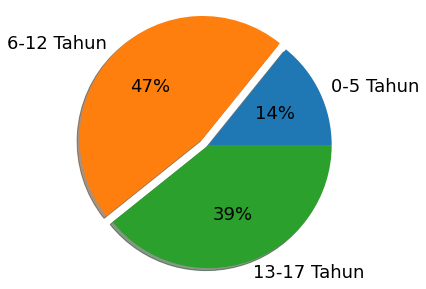

In [52]:
print('Male victims based on age', '\n')
usia = '0-5 Tahun', '6-12 Tahun', '13-17 Tahun'
korban = [((171/1205)*100), ((561/1205)*100), ((473/1205)*100)]
explode = (0, 0.07, 0)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(korban, explode=explode, labels=usia, autopct='%1.0f%%',
        shadow=True, startangle=0,textprops={'fontsize': 18})
ax1.axis('equal')
plt.show()

Violence toward male based on region/kabupaten
AxesSubplot(0.125,0.125;0.775x0.755)


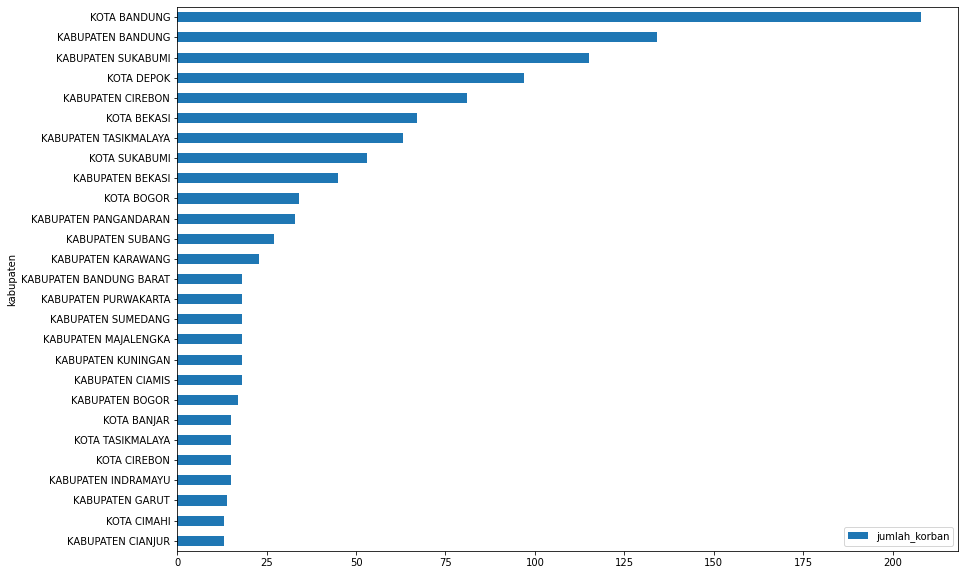

In [53]:
sum_male = client.query('''
select 
  distinct(nama_kabupaten_kota) as kabupaten,
  sum(jumlah_korban) as jumlah_korban
from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
group by nama_kabupaten_kota
order by jumlah_korban asc''').to_dataframe()

# Bar Chart
print('Violence toward male based on region/kabupaten')
print(sum_male.plot(kind = 'barh', figsize = (14, 10), y = 'jumlah_korban', x = 'kabupaten'))


**Answer**  
As the the summarized table above, there are no victim in age above 18 years. The victim are in range 0 to 17 years old. The most male victim is in range 6 to 12 years old which is pre-teen with 561 victims, meanwhile the the teenagers from 13 to 17 years old is 473 victims, and baby/toddler from 0 to 5 years old is 171 victims, during 2017 up to 2021 in West Java. The grand total of family violence victims in West Java from 2017 to 2022 is 1205 persons.  

The city with first highest number of family violence is Kota Bandung, with total number of victims is 208 during 2017 to 2021. Meanwhile the second and the third highest is Kabupaten Bandung with 134 total victims and Kabupaten Sukabumi with 115 total victims.

###2. What city is the highest number of family violence towards female?

In [54]:
fam_violence_female2 = client.query('''
select *
from
  (select
    distinct nama_kabupaten_kota as kabupaten,
    _0_5._0_5,
    _6_12._6_12,
    _13_17._13_17,
    _18_24._18_24,
    _25_44._25_44,
    _45_59._45_59,
    _60_plus._60_plus,
    total_per_kabupaten.total_per_kabupaten
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan` as awal
  join #0_5
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _0_5
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="0-5 TAHUN"
    group by kota) as _0_5
      on awal.nama_kabupaten_kota = _0_5.kota
  join #6_12
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _6_12
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="6-12 TAHUN"
    group by nama_kabupaten_kota) as _6_12
      on awal.nama_kabupaten_kota = _6_12.kota
  join #13_17
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _13_17
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="13-17 TAHUN"
    group by nama_kabupaten_kota) as _13_17
      on awal.nama_kabupaten_kota = _13_17.kota
  join #18_24
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _18_24
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="18-24 TAHUN"
    group by nama_kabupaten_kota) as _18_24
    on awal.nama_kabupaten_kota = _18_24.kota
  join #25_44
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _25_44
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="25-44 TAHUN"
    group by nama_kabupaten_kota) as _25_44
      on awal.nama_kabupaten_kota = _25_44.kota
  join #45_59
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _45_59
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="45-59 TAHUN"
    group by nama_kabupaten_kota) as _45_59
      on awal.nama_kabupaten_kota = _45_59.kota
  join #60+
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _60_plus
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="60+ TAHUN"
    group by nama_kabupaten_kota) as _60_plus
      on awal.nama_kabupaten_kota = _60_plus.kota
  join #total_per_kabupaten
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as total_per_kabupaten
      from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
      group by nama_kabupaten_kota) as total_per_kabupaten
        on awal.nama_kabupaten_kota = total_per_kabupaten.kota)

union all

select 'GRAND TOTAL' as kabupaten,
sum(_0_5) as _0_5,
sum(_6_12) as _6_12,
sum(_13_17) as _13_17,
sum(_18_24) as _18_24,
sum(_25_44) as _25_44,
sum(_45_59) as _45_59,
sum(_60_plus) as _60_plus,
sum(total_per_kabupaten) as total_per_kabupaten
from
(select
    distinct nama_kabupaten_kota as kabupaten,
    _0_5._0_5,
    _6_12._6_12,
    _13_17._13_17,
    _18_24._18_24,
    _25_44._25_44,
    _45_59._45_59,
    _60_plus._60_plus,
    total_per_kabupaten.total_per_kabupaten
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan` as awal
  join #0_5
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _0_5
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="0-5 TAHUN"
    group by kota) as _0_5
      on awal.nama_kabupaten_kota = _0_5.kota
  join #6_12
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _6_12
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="6-12 TAHUN"
    group by nama_kabupaten_kota) as _6_12
      on awal.nama_kabupaten_kota = _6_12.kota
  join #13_17
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _13_17
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="13-17 TAHUN"
    group by nama_kabupaten_kota) as _13_17
      on awal.nama_kabupaten_kota = _13_17.kota
  join #18_24
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _18_24
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="18-24 TAHUN"
    group by nama_kabupaten_kota) as _18_24
    on awal.nama_kabupaten_kota = _18_24.kota
  join #25_44
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _25_44
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="25-44 TAHUN"
    group by nama_kabupaten_kota) as _25_44
      on awal.nama_kabupaten_kota = _25_44.kota
  join #45_59
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _45_59
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="45-59 TAHUN"
    group by nama_kabupaten_kota) as _45_59
      on awal.nama_kabupaten_kota = _45_59.kota
  join #60+
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as _60_plus
    from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
    where kelompok_usia="60+ TAHUN"
    group by nama_kabupaten_kota) as _60_plus
      on awal.nama_kabupaten_kota = _60_plus.kota
  join #total_per_kabupaten
    (select
      distinct nama_kabupaten_kota as kota,
      sum(jumlah_korban) as total_per_kabupaten
      from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
      group by nama_kabupaten_kota) as total_per_kabupaten
        on awal.nama_kabupaten_kota = total_per_kabupaten.kota)
  order by total_per_kabupaten
''').to_dataframe().reset_index()
fam_violence_female2

,index,kabupaten,_0_5,_6_12,_13_17,_18_24,_25_44,_45_59,_60_plus,total_per_kabupaten
0,0,KABUPATEN CIANJUR,0,4,9,0,3,1,0,17
1,1,KABUPATEN KUNINGAN,1,10,11,9,14,3,0,48
2,2,KOTA TASIKMALAYA,4,7,19,5,15,3,0,53
3,3,KABUPATEN BOGOR,1,10,15,7,21,7,0,61
4,4,KABUPATEN GARUT,1,12,28,5,13,3,0,62
5,5,KOTA BANJAR,4,11,31,6,13,2,0,67
6,6,KOTA CIMAHI,1,20,18,6,22,5,0,72
7,7,KOTA CIREBON,4,6,19,8,33,5,1,76
8,8,KABUPATEN CIAMIS,5,10,33,9,15,4,0,76
9,9,KABUPATEN MAJALENGKA,3,14,48,7,7,2,0,81


Female victims based on age 



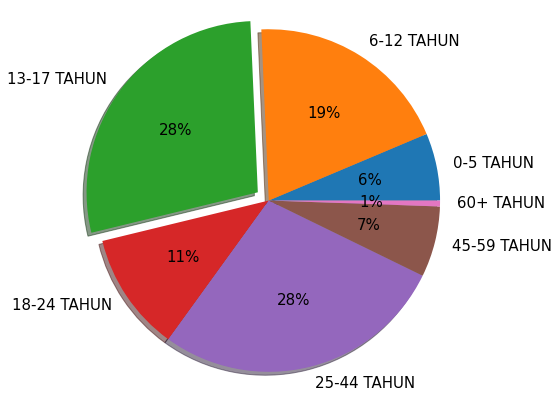

In [55]:
# Pie chart
print('Female victims based on age', '\n')
usia_f = fam_violence_female['kelompok_usia'].unique().tolist()
korban_f = [((298/4690)*100), ((907/4690)*100), ((1318/4690)*100), ((527/4690)*100), ((1301/4690)*100), ((313/4690)*100), ((26/4690)*100)]
explode_f = (0, 0, 0.08, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(korban_f, explode=explode_f, labels=usia_f, autopct='%1.0f%%',
        shadow=True, startangle=0,textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

Violence toward female based on region/kabupaten
AxesSubplot(0.125,0.125;0.775x0.755)


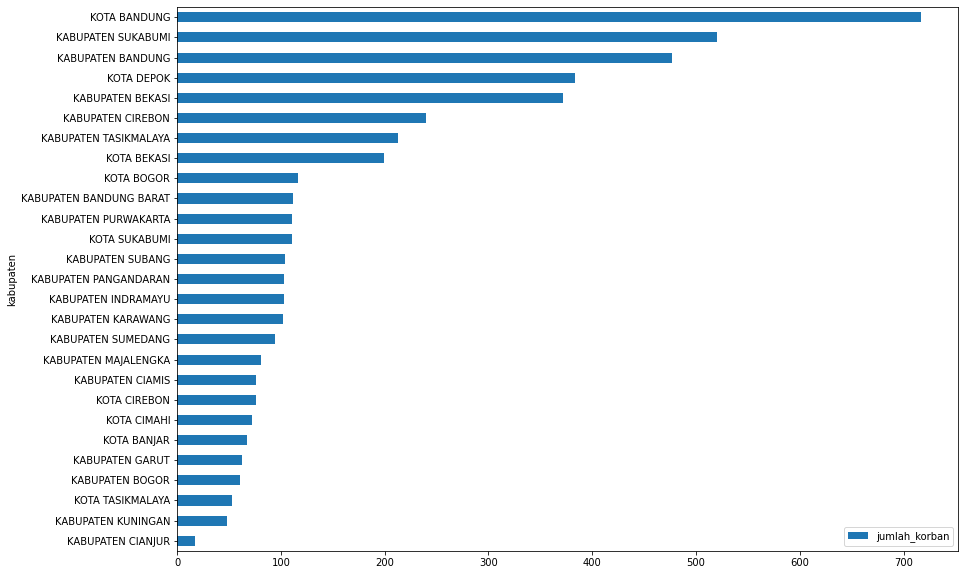

In [56]:
sum_female = client.query('''
select 
  distinct(nama_kabupaten_kota) as kabupaten,
  sum(jumlah_korban) as jumlah_korban
from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
group by nama_kabupaten_kota
order by jumlah_korban asc''').to_dataframe()

# Bar Chart
print('Violence toward female based on region/kabupaten')
print(sum_female.plot(kind = 'barh', figsize = (14, 10), y = 'jumlah_korban', x = 'kabupaten'))

***Answer***  
Compared to the male victims, it seems that female has more victim than male in family violence. The victim is in wide range from 0 to +60 years old, meanwhile the male victim is only up to 17 years old.  

The first one is Kota Bandung which has 717 total female victims, meanwhile the second and the third is Kabupaten Sukabumi with 520 total female victims and Kabupaten Bandung with 477 total female victims.

Moreover, we can assume also that Kota Bandung, Kabupaten Sukabumi and Kabupaten Bandung is the top 3 city with the highest number in responsible of family violince, either male or female victims.  

###3. What city is the lowest and the highest number of family violence towards both male and female?

We have two daframes which are separated by the gender. To make a better summarization, it's better to unite the table into a single dataframe and create a new column for gender:

In [57]:
male_female = client.query('''
select
  distinct nama_kabupaten_kota as kabupaten,
  sum(laki.jumlah_korban) as laki_laki,
  perempuan.perempuan,
  sum(laki.jumlah_korban) + perempuan.perempuan as total
from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki` as laki
join
  (select
    distinct nama_kabupaten_kota as kabupaten,
    sum(jumlah_korban) as perempuan
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
  group by kabupaten) as perempuan
    on perempuan.kabupaten = laki.nama_kabupaten_kota
group by kabupaten, perempuan
order by total desc''').to_dataframe().reset_index()

#The most both male & female
print('__________________________________________________________')
print('City with the most victim both male and female :', '\n')
print(male_female.head(3), '\n')
print('__________________________________________________________')

#The least both male & female
print('City with the least victim both male and female :', '\n')
print(male_female.tail(3))

__________________________________________________________
City with the most victim both male and female : 

   index           kabupaten  laki_laki  perempuan  total
0      0        KOTA BANDUNG        208        717    925
1      1  KABUPATEN SUKABUMI        115        520    635
2      2   KABUPATEN BANDUNG        134        477    611 

__________________________________________________________
City with the least victim both male and female : 

    index           kabupaten  laki_laki  perempuan  total
24     24    KOTA TASIKMALAYA         15         53     68
25     25  KABUPATEN KUNINGAN         18         48     66
26     26   KABUPATEN CIANJUR         13         17     30


***answer***  
Even, after we combined two dataframe, Kota Bandung is still the most family violence towards male and female during 2017 to 2022. Meanwhile, the during the 5 years Kabupaten Cianjur is still the lowest one.  


###6. Which gender is the highest number of victim in West Java province?

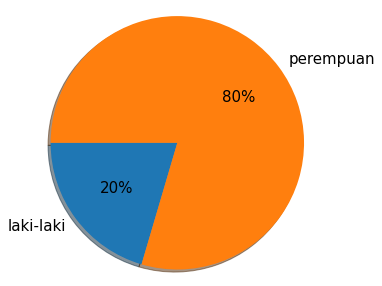

   index jenis_kelamin  jumlah_korban
0      0     laki-laki           1205
1      1     perempuan           4690


In [58]:

gender_rank = client.query('''
select
  distinct jenis_kelamin,
  sum(jumlah_korban) as jumlah_korban
from
(select
  nama_kabupaten_kota as kabupaten,
  kelompok_usia as usia,
  jumlah_korban,
  tahun,
  'laki-laki' as jenis_kelamin
from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
union all
select
  nama_kabupaten_kota as kabupaten,
  kelompok_usia as usia,
  jumlah_korban,
  tahun,
  'perempuan' as jenis_kelamin
from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`)
group by jenis_kelamin
''').to_dataframe()

# pie chart
gender = gender_rank['jenis_kelamin'].tolist()
korban_mf = gender_rank['jumlah_korban'].tolist()
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(korban_mf, labels=gender, autopct='%1.0f%%',
        shadow=True, startangle=180,textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

print(gender_rank.reset_index())

***answer***  
The graphic shows clearly the comparison between male and female victim that woman is the most one with 80% of total case during 2017 to 2022.

### 7. From 2017 to 2021, what city is the first rank from month to month towards male and female?

In [59]:
yeartoyear = client.query('''
select
  distinct tahun,
  kabupaten as first_rank_kota,
  jumlah_korban
from
  (select *,
    dense_rank() over (partition by tahun order by jumlah_korban desc) as rank
  from
    (select
        distinct tahun,
        kabupaten,
        sum(jumlah_korban) as jumlah_korban
      from
        (select
          nama_kabupaten_kota as kabupaten,
          kelompok_usia as usia,
          jumlah_korban,
          tahun,
          'laki-laki' as jenis_kelamin
        from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
        union all
        select
          nama_kabupaten_kota as kabupaten,
          kelompok_usia as usia,
          jumlah_korban,
          tahun,
          'perempuan' as jenis_kelamin
        from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
        order by jumlah_korban, tahun desc)
      group by tahun, kabupaten))
where rank=1
order by tahun
''').to_dataframe()
yeartoyear

,tahun,first_rank_kota,jumlah_korban
0,2017,KABUPATEN BANDUNG,171
1,2018,KOTA DEPOK,99
2,2019,KOTA BANDUNG,296
3,2020,KOTA BANDUNG,253
4,2021,KOTA BANDUNG,255


***answer***  
The table above shows the first rank of the year of city in West Java. The last three years proved that Kota Bandung is the city with the most violence towards either male or female.

To prevent worse future outcome, local government has to do a research why Kota Bandung is the most family violence based on the data we have concluded. 

# CENTRAL TENDENCY

###1. Family violence towards male based on cities in West Java

In [60]:
sum_male.describe().round().T

,count,mean,std,min,25%,50%,75%,max
jumlah_korban,27.0,45.0,47.0,13.0,16.0,18.0,58.0,208.0


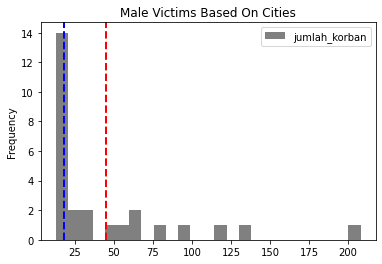

Skewness value : 2.13
Average victims per year per city : 9.0 persons


In [61]:
sum_male.plot.hist(title='Male Victims Based On Cities', color='grey', bins=25)  
axvline_mean = plt.axvline(sum_male['jumlah_korban'].mean(), color='red', linestyle='dashed', linewidth=2)
axvline_median = plt.axvline(sum_male['jumlah_korban'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

print('Skewness value :', sum_male['jumlah_korban'].skew().round(2))
print('Average victims per year per city :', (sum_male['jumlah_korban'].mean()/5).round(), 'persons')

From 27 total cities in West Java, the average victims per are is 45 persons from 2017 to 2021. This means average per year is 9 persons per city. 

###2. Family violence towards male based on cities in West Java

In [62]:
sum_female.describe().round().T

,count,mean,std,min,25%,50%,75%,max
jumlah_korban,27.0,174.0,172.0,17.0,74.0,103.0,206.0,717.0


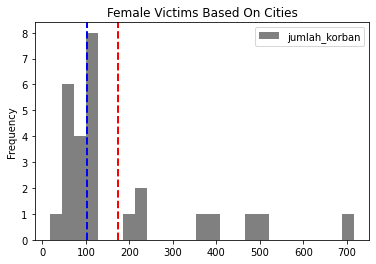

Skewness value : 1.87
Average victims per year per city : 35.0 persons


In [63]:
sum_female.plot.hist(title='Female Victims Based On Cities', color='grey', bins=25)  
axvline_mean = plt.axvline(sum_female['jumlah_korban'].mean(), color='red', linestyle='dashed', linewidth=2)
axvline_median = plt.axvline(sum_female['jumlah_korban'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()

print('Skewness value :', sum_female['jumlah_korban'].skew().round(2))
print('Average victims per year per city :', (sum_female['jumlah_korban'].mean()/5).round(), 'persons')

#HYPOTHESIS TESTING

There is one interesting point we will try to analyze. **KOTA BANDUNG** is cith with the highest responsible in social issue of family violence, this city was in the first rank of the year in a row during 2019 to 2021. Meanwhile, **KABUPATEN CIANJUR** is the lowest one, it has only 30 victims both male and female during 2017 to 2021.

We will try to prove that people of KOTA BANDUNG and KABUPATEN CIANJUR whether they have a same tendency in family violence or has a same social issue.

Let's define the two cities with symbol :

      μ = KOTA BANDUNG  
      x = KABUPATEN CIANJUR
  

State the first hypothesis :  
   **𝐻0 : μ family violence = x family violence**  

State the first hypothesis :  
   **𝐻1 : μ family violence != x family violence**  


The null hypothesis (H0) states that KOTA BANDUNG has a same tendency in family violence or social behavior with KABUPATEN CIANJUR or vice versa.

The alternative hypothesis (H1) states that KOTA BANDUNG has no same tendency or in family violence or social behavior with KABUPATEN CIANJUR or vice versa.  

Take a look the dataframe of KOTA BANDUNG and KABUPATEN CIANJUR as following :

In [93]:
dfhypothesis = client.query('''
select
  kabupaten,
  tahun,
  sum(jumlah_korban) as jumlah_korban
from
  (select
    nama_kabupaten_kota as kabupaten,
    tahun,
    SUM(jumlah_korban) as jumlah_korban,
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
  where nama_kabupaten_kota='KOTA BANDUNG'
  group by nama_kabupaten_kota, tahun
  union all
  select
    nama_kabupaten_kota as kabupaten,
    tahun,
    sum(jumlah_korban) as jumlah_korban,
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
  where nama_kabupaten_kota='KOTA BANDUNG'
  group by nama_kabupaten_kota, tahun)
group by kabupaten,tahun
union all
select
  kabupaten,
  tahun,
  sum(jumlah_korban) as jumlah_korban
from
  (select
    nama_kabupaten_kota as kabupaten,
    tahun,
    SUM(jumlah_korban) as jumlah_korban,
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.lakilaki`
  where nama_kabupaten_kota='KABUPATEN CIANJUR'
  group by nama_kabupaten_kota, tahun
  union all
  select
    nama_kabupaten_kota as kabupaten,
    tahun,
    sum(jumlah_korban) as jumlah_korban,
  from `hacktiv8-tama.kekerasan_pada_lakilaki_perempuan.perempuan`
  where nama_kabupaten_kota='KABUPATEN CIANJUR'
  group by nama_kabupaten_kota, tahun)
group by kabupaten,tahun
''').to_dataframe()
dfhypothesis

,kabupaten,tahun,jumlah_korban
0,KABUPATEN CIANJUR,2017,11
1,KABUPATEN CIANJUR,2018,6
2,KABUPATEN CIANJUR,2019,3
3,KABUPATEN CIANJUR,2020,2
4,KABUPATEN CIANJUR,2021,8
5,KOTA BANDUNG,2017,54
6,KOTA BANDUNG,2018,67
7,KOTA BANDUNG,2019,296
8,KOTA BANDUNG,2020,253
9,KOTA BANDUNG,2021,255


###1. KABUPATEN CIANJUR

           kabupaten  tahun  jumlah_korban
0  KABUPATEN CIANJUR   2017             11
1  KABUPATEN CIANJUR   2018              6
2  KABUPATEN CIANJUR   2019              3
3  KABUPATEN CIANJUR   2020              2
4  KABUPATEN CIANJUR   2021              8 



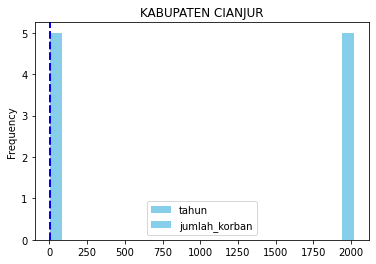

Skewness value : 0.35 

5-number summary :
min : 2.00
q1 : 3.00
median : 6.00
q3 : 8.00
max : 11.00 

IQR =  5.0
Upper limit =  15.5
Lower limit =  -4.5


In [94]:
kabupaten_cianjur = dfhypothesis.loc[dfhypothesis['kabupaten'] == 'KABUPATEN CIANJUR'].reset_index().drop('index', axis=1)
print(kabupaten_cianjur, '\n')

#matplotlib
kabupaten_cianjur.plot.hist(title='KABUPATEN CIANJUR', color='skyblue', bins=25)  
axvline_mean = plt.axvline(kabupaten_cianjur['jumlah_korban'].mean(), color='red', linestyle='dashed', linewidth=2)
axvline_median = plt.axvline(kabupaten_cianjur['jumlah_korban'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()
print('Skewness value :', kabupaten_cianjur['jumlah_korban'].skew().round(2), '\n')

q1_kabupatencianjur, q3_kabupatencianjur = np.percentile(kabupaten_cianjur['jumlah_korban'], [25, 75])

# IQR = q3 - q1
iqr_kabupatencianjur = q3_kabupatencianjur - q1_kabupatencianjur

print('5-number summary :')
print('min : %.2f' % kabupaten_cianjur['jumlah_korban'].min())
print('q1 : %.2f' % q1_kabupatencianjur)
print('median : %.2f' % kabupaten_cianjur['jumlah_korban'].median())
print('q3 : %.2f' % q3_kabupatencianjur)
print('max : %.2f' % kabupaten_cianjur['jumlah_korban'].max(), '\n')

# Upper bound = Q3 + 3*IQR         
upper_limit_kabupatencianjur = q3_kabupatencianjur + 1.5*iqr_kabupatencianjur

# Lower boundaries = Q1 - 3*IQR
lower_limit_kabupatencianjur = q1_kabupatencianjur - 1.5*iqr_kabupatencianjur

print('IQR = ', iqr_kabupatencianjur)
print('Upper limit = ', upper_limit_kabupatencianjur)
print('Lower limit = ', lower_limit_kabupatencianjur)

***Outliers in KABUPATEN CIANJUR***

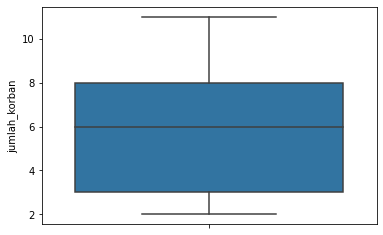

In [95]:
sns.boxplot(data=kabupaten_cianjur, y='jumlah_korban')

Since the skewness value 0.35, this means the data distribution is normal as proved by the boxplot graph.
The skewness value for normal distribution is **0.5 to 1** or **-0.5 to 1**

###1. KOTA BANDUNG

      kabupaten  tahun  jumlah_korban
0  KOTA BANDUNG   2017             54
1  KOTA BANDUNG   2018             67
2  KOTA BANDUNG   2019            296
3  KOTA BANDUNG   2020            253
4  KOTA BANDUNG   2021            255 



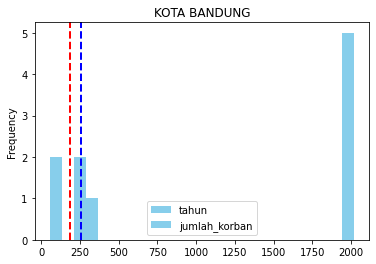

Skewness value : -0.51 

5-number summary :
min : 54.00
q1 : 67.00
median : 253.00
q3 : 255.00
max : 296.00 

IQR =  188.0
Upper limit =  537.0
Lower limit =  -215.0


In [96]:
kota_bandung = dfhypothesis.loc[dfhypothesis['kabupaten'] == 'KOTA BANDUNG'].reset_index().drop('index', axis=1)
print(kota_bandung, '\n')

#matplotlib
kota_bandung.plot.hist(title='KOTA BANDUNG', color='skyblue', bins=25)  
axvline_mean = plt.axvline(kota_bandung['jumlah_korban'].mean(), color='red', linestyle='dashed', linewidth=2)
axvline_median = plt.axvline(kota_bandung['jumlah_korban'].median(), color='blue', linestyle='dashed', linewidth=2)
plt.show()
print('Skewness value :', kota_bandung['jumlah_korban'].skew().round(2), '\n')

q1_kotabandung, q3_kotabandung = np.percentile(kota_bandung['jumlah_korban'], [25, 75])

# IQR = q3 - q1
iqr_kotabandung = q3_kotabandung - q1_kotabandung

print('5-number summary :')
print('min : %.2f' % kota_bandung['jumlah_korban'].min())
print('q1 : %.2f' % q1_kotabandung)
print('median : %.2f' % kota_bandung['jumlah_korban'].median())
print('q3 : %.2f' % q3_kotabandung)
print('max : %.2f' % kota_bandung['jumlah_korban'].max(), '\n')

# Upper bound = Q3 + 3*IQR         
upper_limit_kotabandung = q3_kotabandung + 1.5*iqr_kotabandung

# Lower boundaries = Q1 - 3*IQR
lower_limit_kotabandung = q1_kotabandung - 1.5*iqr_kotabandung

print('IQR = ', iqr_kotabandung)
print('Upper limit = ', upper_limit_kotabandung)
print('Lower limit = ', lower_limit_kotabandung)

***Outliers in KOTA BANDUNG***

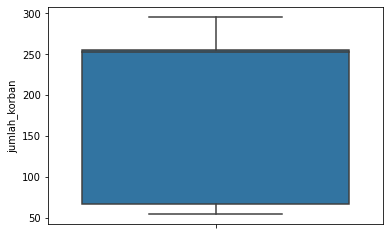

In [97]:
sns.boxplot(data=kota_bandung, y='jumlah_korban')

Since the skewness value -0.51, this means the data distribution is normal as proved by the boxplot graph. The skewness value for normal distribution is **0.5 to 1** or **-0.5 to -1**

### Hypothesis Proving

Standard deviation comparison KABUPATEN BANDUNG vs. KOTA BANDUNG :

In [98]:
# standard deviation KABUPATEN CIANJUR vs. KOTA BANDUNG
print('stdv KABUPATEN CIANJUR :', kabupaten_cianjur['jumlah_korban'].std().round(2))
print('stdv KOTA BANDUNG :', kota_bandung['jumlah_korban'].std().round(2))

stdv KABUPATEN CIANJUR : 3.67
stdv KOTA BANDUNG : 115.03


Variance comparison KABUPATEN CIANJUR vs. KOTA BANDUNG :

In [99]:
# variance KABUPATEN CIANJUR vs. KOTA BANDUNG
print('var KABUPATEN CIANJUR  :', kabupaten_cianjur['jumlah_korban'].var().round(2))
print('var KOTA BANDUNG :', kota_bandung['jumlah_korban'].var().round(2))

var KABUPATEN CIANJUR  : 13.5
var KOTA BANDUNG : 13232.5


Range comparison KABUPATEN CIANJUR vs. KOTA BANDUNG :

In [100]:
# range KABUPATEN CIANJUR vs. KOTA BANDUNG
print('range KABUPATEN CIANJUR :', kabupaten_cianjur['jumlah_korban'].max().round(2) - kabupaten_cianjur['jumlah_korban'].min().round(2))
print('range KOTA BANDUNG :', kota_bandung['jumlah_korban'].max().round(2) - kota_bandung['jumlah_korban'].min().round(2))

range KABUPATEN CIANJUR : 9
range KOTA BANDUNG : 242


Take a look once again the hypothesis statement :

      μ = KOTA BANDUNG  
      x = KABUPATEN CIANJUR
  

State the first hypothesis :  
   **𝐻0 : μ family violence = x family violence**  

State the first hypothesis :  
   **𝐻1 : μ family violence != x family violence**  
    
The null hypothesis (H0) states that KOTA BANDUNG has a same tendency in family violence or social behavior with KABUPATEN CIANJUR or vice versa.  

The alternative hypothesis (H1) states that KOTA BANDUNG has no same tendency or in family violence or social behavior with KABUPATEN CIANJUR or vice versa.

**Hypothesis testing using T-Test wih 2 sample 2 tailed** 

In [103]:
# t-test
t_stat, p_val = stats.ttest_ind(kota_bandung['jumlah_korban'], kabupaten_cianjur['jumlah_korban'])
print('P-value = ',p_val.round(3)*100, '%')
print('t-statistics = ',t_stat.round(3))

P-value =  0.8 %
t-statistics =  3.478


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-40.45976103250669


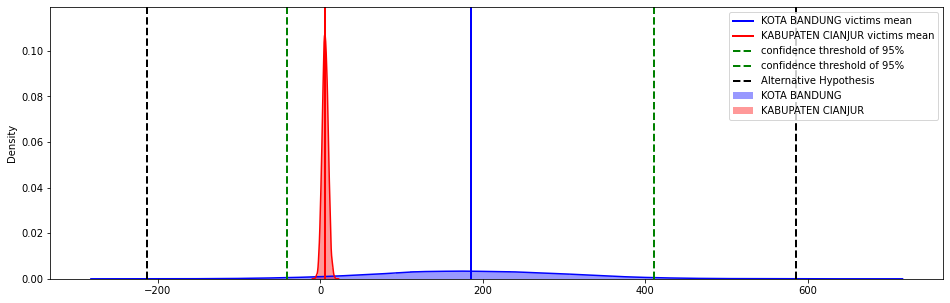

In [111]:
#simulation
kotabandung_ttest = np.random.normal(kota_bandung['jumlah_korban'].mean(), kota_bandung['jumlah_korban'].std(), 10000)
kabcianjur_ttest = np.random.normal(kabupaten_cianjur['jumlah_korban'].mean(), kabupaten_cianjur['jumlah_korban'].std(), 10000)

# confidence interval based on KOTA BANDUNG victims with critical value 0.05
ci = stats.norm.interval(0.95, kota_bandung['jumlah_korban'].mean(), kota_bandung['jumlah_korban'].std())

# pdf visualization
plt.figure(figsize=(16,5))
sns.distplot(kotabandung_ttest, label='KOTA BANDUNG', color='blue')
sns.distplot(kabcianjur_ttest, label='KABUPATEN CIANJUR', color='red')

# mean
plt.axvline(kota_bandung['jumlah_korban'].mean(), color='blue', linewidth=2, label='KOTA BANDUNG victims mean')
plt.axvline(kabupaten_cianjur['jumlah_korban'].mean(), color='red',  linewidth=2, label='KABUPATEN CIANJUR victims mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# alternative hypotesis
plt.axvline(kotabandung_ttest.mean()+t_stat*kotabandung_ttest.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(kotabandung_ttest.mean()-t_stat*kotabandung_ttest.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

**Hypothesis result**  
The T-Test method has proved that there is significant result between 2 variables; KOTA BANDUNG and KABUPATEN CIANJUR.  

The null hypothesis states that KOTA BANDUNG and KABUPATEN CIANJUR has the same social behavior regarding the family violence issue. Meanwhile, the alternative hypothesis states that KOTA BANDUNG and KABUPATEN CIANJUR has no same social behavior regarding the family violence issue.  

However, the T-Test method has shown the result for those 2 different hypothesis. As the graphic shown above, the black-dotted line is alternative hypothesis, it lies outside of confidence threshold line. This indicates that **null hypothesis is rejected**.   

So, in other words, people in KABUPATEN CIANJUR has no same tendency in social issue regarding the family violence in KOTA BANDUNG, or vice versa.


# CONCLUSION

1. There are 27 cities in West Java  which has social issue of family violence.
2. Female victims is greater than male victims.
3. The highest number of male victims is in range 6 - 12 years old.
4. The highest number of female victims is in range 13 - 17 years old.
5. Total male victims from 2017 to 2021 is 1205 persons.
6. Total female victims from 2017 to 2021 is 4690 persons.
7. The average victims both male and female is 44 persons per city per year.
8. Kota Bandung is the highest number of family violence with 925 persons during 2017 to 2021.
9. Kabupaten Cianjur is the lowest number of family violence with 30 persons during 2017 to 2021.
